In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Model Training



In [2]:
!ls

drive  sample_data


In [3]:
%cd ./drive/MyDrive/ProbML4TimeSeries/
#%cd ../ProbML4TimeSeries/

/content/drive/MyDrive/ProbML4TimeSeries


In [4]:
import torch
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
!python run_sim.py --is_training 1 --model_id "test_example_1_3" --example_name "Toy_Example" --root_path '../data/Toy_example/' --freq 'None' --seq_len 40 --label_len 20 --pred_len 20 --seq_len_markov 10 --d_model 1024 --tail_factor_state 1.3 --e_layers 3 --d_layers 3 --enc_in 3 --state_init_root_path '../data/Toy_example/state_toy_example_gauss_sim_300.pt' --amount_init_root_path '../data/Toy_example/amount_toy_example_gauss_sim.pt' --time_init_root_path '../data/Toy_example/time_toy_example_gauss_sim.pt'

Args in experiment:
Namespace(is_training=1, model_id='test_example_1_3', example_name='Toy_Example', root_path='../data/Toy_example/', freq='None', checkpoints='../checkpoints/', state_init_root_path='../data/Toy_example/state_toy_example_gauss_sim_300.pt', amount_init_root_path='../data/Toy_example/amount_toy_example_gauss_sim.pt', time_init_root_path='../data/Toy_example/time_toy_example_gauss_sim.pt', seq_len_markov=10, seq_len=40, label_len=20, pred_len=20, num_grps=300, tail_pct=0.3333333333333333, tail_factor_state=1.3, enc_in=3, d_model=1024, n_heads=8, e_layers_markov=3, e_layers=3, d_layers=3, d_ff=2048, factor=7, distil=True, dropout=0.05, embed='timeF', activation='gelu', output_attention=False, num_workers=0, train_epochs=20, batch_size=256, patience=3, learning_rate=0.0001, des='exp', lradj='type2', use_gpu=True, gpu=0, use_multi_gpu=False, devices='0,1,2,3', dec_in=3, c_out=3)
Use GPU: cuda:0
Use GPU: cuda:0
>>>>>>>start training for Markov model: test_example_1_3_Markov

In [ ]:
#!python run_sim.py --is_training 0 --model_id "test_example_12_2" --example_name "Toy_Example" --root_path '../data/Toy_example/' --freq 'None' --seq_len 40 --label_len 20 --pred_len 20 --seq_len_markov 10 --d_model 1024 --tail_factor_state 1.3 --e_layers 3 --d_layers 3 --enc_in 3 --state_init_root_path '../data/Toy_example/state_toy_example_gauss_sim_300.pt' --amount_init_root_path '../data/Toy_example/amount_toy_example_gauss_sim.pt' --time_init_root_path '../data/Toy_example/time_toy_example_gauss_sim.pt'

Args in experiment:
Namespace(is_training=0, model_id='test_example_12_2', example_name='Toy_Example', root_path='../data/Toy_example/', freq='None', checkpoints='../checkpoints/', state_init_root_path='../data/Toy_example/state_toy_example_gauss_sim_300.pt', amount_init_root_path='../data/Toy_example/amount_toy_example_gauss_sim.pt', time_init_root_path='../data/Toy_example/time_toy_example_gauss_sim.pt', seq_len_markov=10, seq_len=40, label_len=20, pred_len=20, num_grps=300, tail_pct=0.3333333333333333, tail_factor_state=1.3, enc_in=3, d_model=1024, n_heads=8, e_layers_markov=3, e_layers=3, d_layers=3, d_ff=2048, factor=7, distil=True, dropout=0.05, embed='timeF', activation='gelu', output_attention=False, num_workers=0, train_epochs=20, batch_size=256, patience=3, learning_rate=0.0001, des='exp', lradj='type2', use_gpu=True, gpu=0, use_multi_gpu=False, devices='0,1,2,3', dec_in=3, c_out=3)
Use GPU: cuda:0
Use GPU: cuda:0
>>>>>>>simulation : test_example_12_2_Informer_Toy_Example_ng3

# Model evaluation

Step 1: Check the inference capability of the deep learning model by using the existing Markov state squence

In [5]:
from utils.tools import dotdict

args = dotdict()
args.model_id = 'test_example_12_2'
args.root_path = '../data/Toy_example/'
args.example_name = 'Toy_Example'
args.freq = 'None'
args.seq_len = 40 # input sequence length of Informer encoder
args.label_len = 20  # start token length of Informer decoder
args.pred_len = 20 # prediction sequence length
args.seq_len_markov = 10 # input sequence length of Markov model
args.num_grps = 300 # number of groups

args.enc_in = 3 # encoder input size
args.dec_in = 3 # decoder input size
args.c_out = 3 # output size
args.d_model = 1024 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 3 # num of encoder layers
args.d_layers = 3 # num of decoder layers
args.d_ff = 2048 # dimension of fcn in model
args.factor = 7 # probsparse attn factor
args.tail_factor_state = 1.3 # tail factor of state
args.dropout = 0.05
args.distil = True
args.embed = 'timeF'
args.activiation = 'gelu'
args.output_attention = False

args.num_workers = 0
args.batch_size = 128
args.use_gpu = True
args.gpu = 0
args.checkpoints = '../checkpoints'
args.learning_rate = 1e-4
args.num_workers = 0
args.itr = 1
args.train_epochs = 20
args.des = 'exp'
args.lradj = 'type2'
args.patience = 3

In [6]:
from exp.exp_main_toy_example import Exp_Main_Toy

# Load the model
exp = Exp_Main_Toy(args)

if args.use_gpu:
  exp.model.load_state_dict(torch.load('../checkpoints/test_example_12_2_Informer_Toy_Example_ng300_sl40_ll20_pl20_dm1024_nh8_el3_dl3_df2048_fc7_dtexp_0/checkpoint.pth'))
else:
  exp.model.load_state_dict(torch.load('../checkpoints/test_example_12_2_Informer_Toy_Example_ng300_sl40_ll20_pl20_dm1024_nh8_el3_dl3_df2048_fc7_dtexp_0/checkpoint.pth', map_location=torch.device('cpu')))

Use GPU: cuda:0


In [7]:
from utils.simulation import read_data_for_simulation, simulate, ecdf, estimate_cor, prepare_amount, reshape_3d_to_2d

# Use historical data for validation
df_amount_path = os.path.join(args.root_path, 'data_toy_example_gauss.csv')
df_state_path = os.path.join(args.root_path, 'state_toy_example_gauss_300.csv')
df_amount_raw = pd.read_csv(df_amount_path)
df_state_raw = pd.read_csv(df_state_path)

amount, state, time, amount_sim = read_data_for_simulation(
    df_amount_raw,
    df_state_raw,
    num_sample=1000,
    seq_len=args.seq_len
)

amount_sim = simulate(exp, amount_sim, state, time)

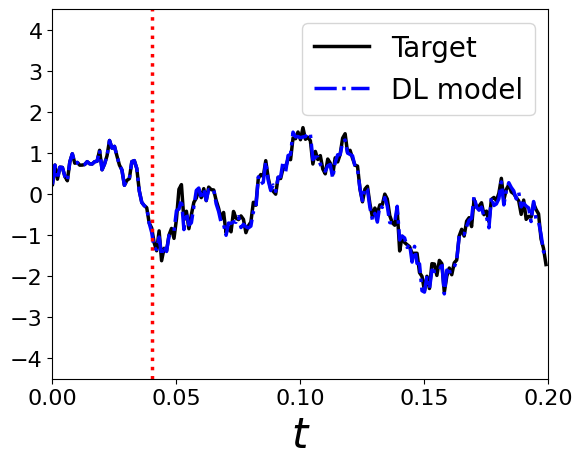

In [14]:
# Time series plot: the last index 0 -> g1(t), 1 -> g2(t), 2 -> g3(t)
true = amount[999, :200, 2]
pred = amount_sim[999, :200, 2]
t = time[999, :200, 0]

%matplotlib inline
fig, ax = plt.subplots()
plt.plot(t, true, 'k-', label='Target', linewidth=2.5)
plt.plot(t, pred, 'b-.', label='DL model', linewidth=2.5)
plt.axvline(x=0.04, color='r', linestyle=':', linewidth=2.5)
plt.xlim([0, 0.2])
plt.ylim([-4.5, 4.5])
ax.set_xticks(ax.get_xticks()[::2])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('$t$', fontsize=30)
plt.legend(fontsize=20)
plt.savefig('../Figures/Toy_example/time_series_comparison_y3.eps', format='eps', bbox_inches="tight")

Step 2: Check the performance of the deep learning model for Markov state sequence generation

In [ ]:
from utils.simulation import reshape_2d_to_3d

state = pd.read_csv('../data/Toy_example/state_toy_example_gauss_300.csv')
state = state[state.columns[1:]].to_numpy()
state = reshape_2d_to_3d(state, 1000)
state_sim = torch.load('../data/Toy_example/state_sim_test_example_12_2_Informer_Toy_Example_ng300_sl40_ll20_pl20_dm1024_nh8_el3_dl3_df2048_fc7_dtexp_0.pt')

In [ ]:
grp_wts = [(sum(sum(state_sim == x)) / (5000 * 200)).item() for x in range(300)]
grp_wts_target = [(sum(sum(state == x)) / (1000 * 201)).item() for x in range(300)]

<Figure size 640x480 with 0 Axes>

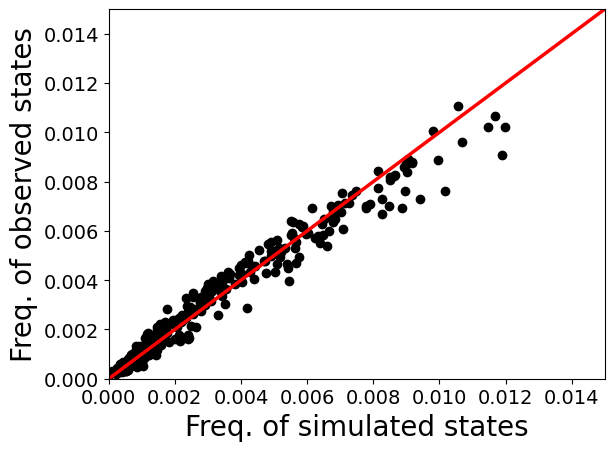

In [ ]:
%matplotlib inline
plt.figure()
fig, ax = plt.subplots()
ax.scatter(grp_wts, grp_wts_target, color='k')
ax.plot([0, 1], [0, 1], 'r-', transform=ax.transAxes, linewidth=2.5)
plt.xlim([0, 0.015])
plt.ylim([0, 0.015])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Freq. of simulated states', fontsize=20)
plt.ylabel('Freq. of observed states', fontsize=20)
plt.savefig('../Figures/Toy_example/state_comparison_toy_example.eps', format='eps', bbox_inches="tight")

In [15]:
from utils.simulation import reshape_3d_to_2d
from scipy.stats import norm, gamma

# Load the observed and simulation data
amount = torch.load('../data/Archive/amount.pt')
amount_Dl = torch.load('../data/Toy_example/amount_Dl_test_example_12_2_Informer_Toy_Example_ng300_sl40_ll20_pl20_dm1024_nh8_el3_dl3_df2048_fc7_dtexp_0.pt')
amount_Chol = torch.load('../data/Toy_example/amount_Chol_test_example_12_2_Informer_Toy_Example_ng300_sl40_ll20_pl20_dm1024_nh8_el3_dl3_df2048_fc7_dtexp_0.pt')
amount_Rshfl = torch.load('../data/Toy_example/amount_Rshfl_test_example_12_2_Informer_Toy_Example_ng300_sl40_ll20_pl20_dm1024_nh8_el3_dl3_df2048_fc7_dtexp_0.pt')

Step 3: Check the spatial correlation matrix

In [16]:
# Reshape
amount = reshape_3d_to_2d(amount, out_type='numpy')
amount_Dl = reshape_3d_to_2d(amount_Dl, out_type='numpy')
amount_Rshfl = reshape_3d_to_2d(amount_Rshfl, out_type='numpy')

In [ ]:
# Calculate the spatial correlation matrix
c_amount = np.matmul(amount.T, amount) / amount.shape[0]
c_amount_Dl = np.matmul(amount_Dl.T, amount_Dl) / amount_Dl.shape[0]
c_amount_Chol = np.matmul(amount_Chol.T, amount_Chol) / amount_Chol.shape[0]
c_amount_Rshfl = np.matmul(amount_Rshfl.T, amount_Rshfl) / amount_Rshfl.shape[0]

print(c_amount)
print(c_amount_Dl)
print(c_amount_Chol)
print(c_amount_Rshfl)

[[1.00276599 0.47068948 0.47828234]
 [0.47068948 0.99841104 0.45332723]
 [0.47828234 0.45332723 1.00530403]]
[[0.9774836  0.46222126 0.50164445]
 [0.46222126 0.94417272 0.43698754]
 [0.50164445 0.43698754 0.961243  ]]
[[1.00246521 0.47072164 0.4783545 ]
 [0.47072164 0.99982119 0.45398023]
 [0.4783545  0.45398023 1.00559924]]
[[0.9994972  0.46897138 0.47356611]
 [0.46897138 0.9994977  0.451442  ]
 [0.47356611 0.451442   1.00100235]]


In [ ]:
# Calculate the Frobenius norm errors
print(np.linalg.norm(c_amount - c_amount_Dl)/np.linalg.norm(c_amount))
print(np.linalg.norm(c_amount - c_amount_Chol)/np.linalg.norm(c_amount))
print(np.linalg.norm(c_amount - c_amount_Rshfl)/np.linalg.norm(c_amount))

0.04106102600538921
0.0008372426087464762
0.0045075566894817185


Step 4: Compare the marginal distributions

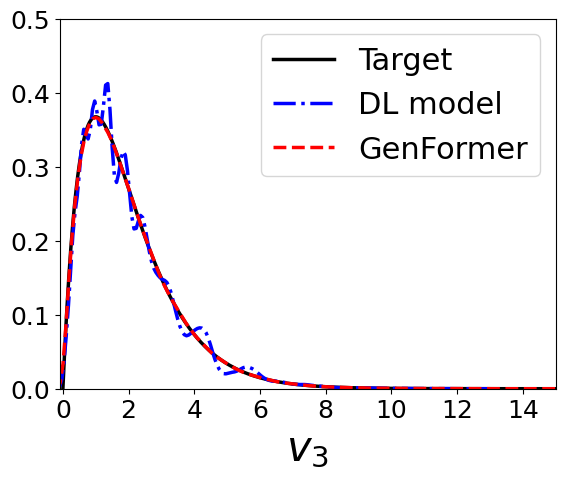

In [ ]:
# Marginal distribution plot: the last index 0 -> x1(t), 1 -> x2(t), 2 -> x3(t)

import seaborn as sns
%matplotlib inline

plt.figure()
plt.plot(np.arange(0, 15, 0.01), gamma.pdf(np.arange(0, 15, 0.01), a=2), 'k-', label='Target', linewidth=2.5)
sns.kdeplot(gamma.ppf(norm.cdf(amount_Dl[:, 2]), a=2), color="b", ls='-.', lw=2.5, label='DL model')
sns.kdeplot(gamma.ppf(norm.cdf(amount_Rshfl[:, 2]), a=2), color="r", ls='--', lw=2.5, label='GenFormer')
plt.xlim([-0.1, 15])
plt.ylim([0, 0.5])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=22)
plt.xlabel(r'$v_3$', fontsize=30)
plt.ylabel('', fontsize=18)
plt.savefig('../Figures/Toy_example/density_x3.eps', format='eps', bbox_inches="tight")

In [ ]:
d_dl_0, base = np.histogram(gamma.ppf(norm.cdf(amount_Dl[:, 0]), a=2), bins=np.arange(0, 15, 0.01), density=True)
d_rshfl_0, _ = np.histogram(gamma.ppf(norm.cdf(amount_Rshfl[:, 0]), a=2), bins=np.arange(0, 15, 0.01), density=True)
d_dl_1, base = np.histogram(gamma.ppf(norm.cdf(amount_Dl[:, 1]), a=2), bins=np.arange(0, 15, 0.01), density=True)
d_rshfl_1, _ = np.histogram(gamma.ppf(norm.cdf(amount_Rshfl[:, 1]), a=2), bins=np.arange(0, 15, 0.01), density=True)
d_dl_2, base = np.histogram(gamma.ppf(norm.cdf(amount_Dl[:, 2]), a=2), bins=np.arange(0, 15, 0.01), density=True)
d_rshfl_2, _ = np.histogram(gamma.ppf(norm.cdf(amount_Rshfl[:, 2]), a=2), bins=np.arange(0, 15, 0.01), density=True)
d_target = gamma.pdf((base[:1499] + base[1:]) / 2, a=2)

In [ ]:
# Calculate the Frobenius norm errors
print((np.linalg.norm(d_dl_0 - d_target, ord=1) + np.linalg.norm(d_dl_1 - d_target, ord=1) + np.linalg.norm(d_dl_2 - d_target, ord=1)) / (3 * np.linalg.norm(d_target, ord=1)))
print((np.linalg.norm(d_rshfl_0 - d_target, ord=1) + np.linalg.norm(d_rshfl_1 - d_target, ord=1) + np.linalg.norm(d_rshfl_2 - d_target, ord=1)) / (3 * np.linalg.norm(d_target, ord=1)))

0.11726035772663221
0.0194298746474332


Step 5: Calculate the auto-correlation functions

In [17]:
from utils.simulation import estimate_cor
time = torch.load('../data/Toy_example/time_toy_example_gauss_sim.pt')

# Calculate the auto-correlation functions
cor_tar = estimate_cor(amount, 1000)
cor_Dl = estimate_cor(amount_Dl, 5000)
cor_Rshfl = estimate_cor(amount_Rshfl, 5000)
t = time[0, :200]

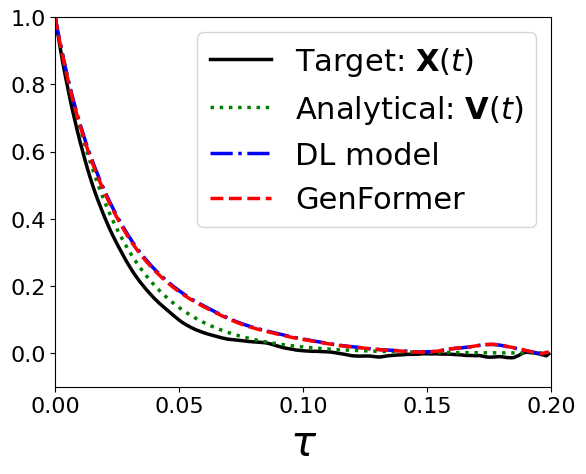

In [20]:
# Auto-correlation plot: the last index 0 -> r11(t), 1 -> r22(t), 2 -> r33(t)

%matplotlib inline
fig, ax = plt.subplots()
plt.plot(t, cor_tar[:200, 0], 'k-', label=r'Target: $\mathbf{X}(t)$', linewidth=2.5)
plt.plot(t, torch.exp(-40 * t), 'g:', label=r'Analytical: $\mathbf{V}(t)$', linewidth=2.5)
plt.plot(t, cor_Dl[:200, 0], 'b-.', label='DL model', linewidth=2.5)
plt.plot(t, cor_Rshfl[:200, 0], 'r--', label='GenFormer', linewidth=2.5)
plt.xlim([0, 0.2])
plt.ylim([-0.1, 1])
ax.set_xticks(ax.get_xticks()[::2])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=22)
plt.xlabel(r'$\tau$', fontsize=30)
plt.savefig('../Figures/Toy_example/cor_function_y1.eps', format='eps', bbox_inches="tight")

Step 6: Calculate the exceedance probabilities of quantity of interest

In [21]:
# Simulate synthetic data from translation model
g_trans = np.random.multivariate_normal([0, 0, 0], np.corrcoef(amount.T), 1000000)
x_trans = gamma.ppf(norm.cdf(g_trans), a=2)
print(x_trans.shape)

(1000000, 3)


In [22]:
from utils.simulation import ecdf

# Calculate the quantity of interest and estimate the exceedance probability
target = gamma.ppf(norm.cdf(amount[:, 0]), a=2) + gamma.ppf(norm.cdf(amount[:, 1]), a=2) + gamma.ppf(norm.cdf(amount[:, 2]), a=2)
pred_Dl = gamma.ppf(norm.cdf(amount_Dl[:, 0]), a=2) + gamma.ppf(norm.cdf(amount_Dl[:, 1]), a=2) + gamma.ppf(norm.cdf(amount_Dl[:, 2]), a=2)
pred_Rshfl = gamma.ppf(norm.cdf(amount_Rshfl[:, 0]), a=2) + gamma.ppf(norm.cdf(amount_Rshfl[:, 1]), a=2) + gamma.ppf(norm.cdf(amount_Rshfl[:, 2]), a=2)
trans = x_trans[:, 0] + x_trans[:, 1] + x_trans[:, 2]

tar_cdf = ecdf(target)
pred_Dl_cdf = ecdf(pred_Dl)
pred_Rshfl_cdf = ecdf(pred_Rshfl)
trans_cdf = ecdf(trans)

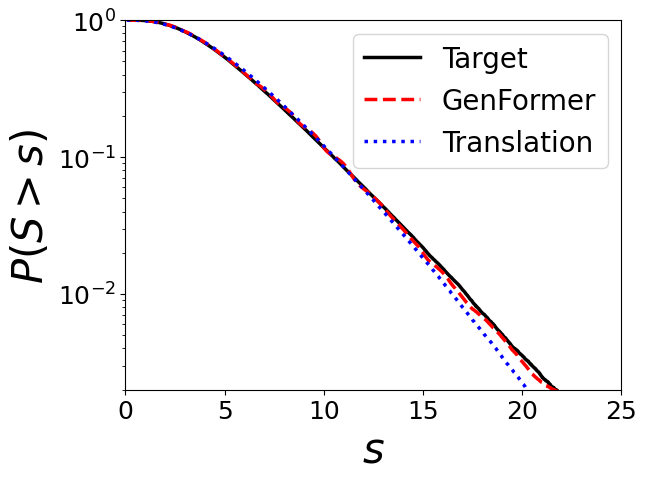

In [23]:
%matplotlib inline
plt.figure()
plt.plot(tar_cdf[0], 1 - tar_cdf[1], 'k-', label='Target', linewidth=2.5)
plt.plot(pred_Rshfl_cdf[0], 1 - pred_Rshfl_cdf[1], 'r--', label='GenFormer', linewidth=2.5)
plt.plot(trans_cdf[0], 1 - trans_cdf[1], 'b:', label='Translation', linewidth=2.5)
plt.yscale("log")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim([2e-3, 1])
plt.xlim([0, 25])
plt.legend(fontsize=20)
plt.xlabel(r'$s$', fontsize=30)
plt.ylabel(r'$P(S > s)$', fontsize=30)
plt.savefig("../Figures/Toy_example/exceedance_probability.eps", format='eps', bbox_inches="tight")

In [ ]:
def ep_error(cdf1, cdf2, threshold_p_lower=2e-3, threshold_p_upper=1):
  threshold_x_lower = np.interp(1 - threshold_p_lower, cdf1[1], cdf1[0])
  threshold_x_upper = np.interp(1 - threshold_p_upper, cdf1[1], cdf1[0])

  base = cdf1[0]
  base = base[(base <= threshold_x_lower) & (base >= threshold_x_upper)]
  ep1 = 1 - np.interp(base, cdf1[0], cdf1[1])
  ep2 = 1 - np.interp(base, cdf2[0], cdf2[1])

  return np.linalg.norm((1/ep1 - 1/ep2), ord=1) / np.linalg.norm(1/ep1, ord=1)

In [ ]:
# Calculate the Frobenius norm errors
print(ep_error(tar_cdf, pred_Dl_cdf, threshold_p_lower=5e-4))
print(ep_error(tar_cdf, pred_Rshfl_cdf, threshold_p_lower=5e-4))
print(ep_error(tar_cdf, trans_cdf, threshold_p_lower=5e-4))

0.13503462081969006
0.06801263487207483
0.3824709826642263


In [ ]:
0.3824 / 0.068

5.623529411764705